# Name: Vandit Shah

## Task 1: Prediction using Supervised ML
Task: Predict the percentage of an student based on the no. of study hours.

## Importing libraries for data visualisation 


In [2]:
from urllib.request import urlretrieve as ret
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
ret(url,'student_scores.csv')

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

In [3]:
df = pd.read_csv('student_scores.csv') # reading the csv file (dataset)
df.head(10) # first ten rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Calculating statistical data

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Summary of data

In [5]:
df.info() #  a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Correlation between columns

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Plot the dataset

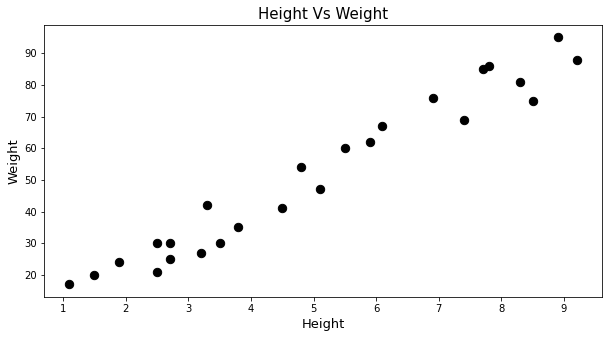

In [7]:
x=df[['Hours']].values # storing values of column 
y=df[['Scores']].values # storing values of column
# x= independent variable
# y= dependent variable
# Plotting the distribution of Data
plt.figure(figsize=(10,5))  # size of the graph(dimensions)
plt.title('Height Vs Weight', fontsize=15)   # title of the plot
plt.xlabel('Height', fontsize=13) # x-axis label
plt.ylabel('Weight', fontsize=13) # y-axis label
plt.scatter(x, y,s=70, color='black')  # providing input values(x and y) to the scatter plot
# s=size of the data point
plt.show()  # display the plot

# Linear Regression
**Importing Libraries for Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression   # To perform linear regression
from sklearn.model_selection import train_test_split  # To divide the dataset into training and test set
from sklearn import metrics # Functions to measure the error 

# Splitting into test and training set

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) # test set size = 20%  
print('Number of rows in  test set:',y_test.shape[0])
print('Number of rows in  training set:',x_train.shape[0])


Number of rows in  test set: 5
Number of rows in  training set: 20


In [10]:
regressor= LinearRegression()

# Training the model

In [11]:
regressor.fit(x_train,y_train)

LinearRegression()

# Coefficient(m) and y-intercept(c) 

In [12]:
 # equation of line=y=m*x + c where m=Coefficient and c=y-intercept
print('Value Of Coefficient(m): ',regressor.coef_)
print('Value of y-intercept(c): ',regressor.intercept_)

Value Of Coefficient(m):  [[9.91065648]]
Value of y-intercept(c):  [2.01816004]


# Predicting the values

In [13]:
predictAll=regressor.predict(x) #predicting all the values
predicted=regressor.predict(x_test)#predicting values in the test set[]


# Comparing Values

In [14]:
predictedTable=pd.DataFrame({'Height':x.flatten() ,'Actual Values': y.flatten(),'Predicted Values' : predictAll.flatten()})
print(predictedTable)
print(metrics.r2_score(y_test,predicted))

    Height  Actual Values  Predicted Values
0      2.5             21         26.794801
1      5.1             47         52.562508
2      3.2             27         33.732261
3      8.5             75         86.258740
4      3.5             30         36.705458
5      1.5             20         16.884145
6      9.2             88         93.196200
7      5.5             60         56.526771
8      8.3             81         84.276609
9      2.7             25         28.776933
10     7.7             85         78.330215
11     5.9             62         60.491033
12     4.5             41         46.616114
13     3.3             42         34.723326
14     1.1             17         12.919882
15     8.9             95         90.223003
16     2.5             30         26.794801
17     1.9             24         20.848407
18     6.1             67         62.473165
19     7.4             69         75.357018
20     2.7             30         28.776933
21     4.8             54       

# Errors

In [15]:
print('RMSE:',metrics.mean_squared_error(y_test,predicted))
print('MAE: ',metrics.mean_absolute_error(y_test,predicted))

RMSE: 21.5987693072174
MAE:  4.183859899002975


# Plotting the final 

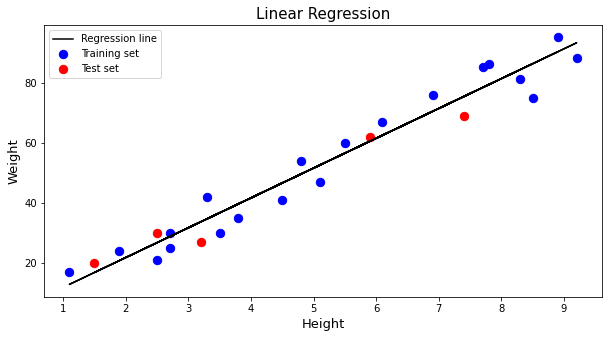

In [16]:
plt.figure(figsize=(10,5))  # size of the graph(dimensions)
plt.title('Linear Regression', fontsize=15)   # title of the plot
plt.scatter(x_train,y_train,s=70,c='b',label='Training set')
plt.scatter(x_test,y_test,s=70,c='r',label='Test set')
plt.xlabel('Height', fontsize=13,) # x-axis label
plt.ylabel('Weight', fontsize=13) # y-axis label
plt.plot(x, predictAll, color='black',label='Regression line')  # providing input values(x and y) to the scatter plot
# s=size of the data point
plt.legend()
plt.show()  # display the plot

In [17]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
inp=input('Enter the total number of hours: ')
ans=regressor.predict([[float(inp)]])
print('Predicted score for {0} hours of study is {1} '.format(inp,float(ans[0])))

Enter the total number of hours: 9.25
Predicted score for 9.25 hours of study is 93.69173248737538 
